# Covid WorldChart - Studienarbeit

## Imports

In [2]:
import pandas as pd
import json
import requests
import datetime

## Filter Data for EU-Countries

In [3]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.json"
data = requests.get(url).json()

EUCountries = []
for country in data:
    if "continent" in data[country]:
        if "Europe" in data[country]["continent"]:
            EUCountries.append(country)
            print(country + " " + data[country]["continent"] + " " + str(data[country]["location"]))       

ALB Europe Albania
AND Europe Andorra
AUT Europe Austria
BLR Europe Belarus
BEL Europe Belgium
BIH Europe Bosnia and Herzegovina
BGR Europe Bulgaria
HRV Europe Croatia
CYP Europe Cyprus
CZE Europe Czech Republic
DNK Europe Denmark
EST Europe Estonia
FRO Europe Faeroe Islands
FIN Europe Finland
FRA Europe France
DEU Europe Germany
GIB Europe Gibraltar
GRC Europe Greece
GGY Europe Guernsey
HUN Europe Hungary
ISL Europe Iceland
IRL Europe Ireland
IMN Europe Isle of Man
ITA Europe Italy
JEY Europe Jersey
OWID_KOS Europe Kosovo
LVA Europe Latvia
LIE Europe Liechtenstein
LTU Europe Lithuania
LUX Europe Luxembourg
MKD Europe Macedonia
MLT Europe Malta
MDA Europe Moldova
MCO Europe Monaco
MNE Europe Montenegro
NLD Europe Netherlands
NOR Europe Norway
POL Europe Poland
PRT Europe Portugal
ROU Europe Romania
RUS Europe Russia
SMR Europe San Marino
SRB Europe Serbia
SVK Europe Slovakia
SVN Europe Slovenia
ESP Europe Spain
SWE Europe Sweden
CHE Europe Switzerland
UKR Europe Ukraine
GBR Europe Unit

## Merging DataFrames for every EU-Country to 1 DataFrame

In [4]:
columns = ["date"]
covidPlot = pd.DataFrame(columns = columns)

for country in EUCountries:
        columns = ["date", country+"_new_cases"]
        dates = []
        new_cases = []
        for countryData in data[country]["data"]:
                if "new_cases" in countryData:
                        new_cases.append(countryData["new_cases"])
                        dates.append(countryData["date"])
        newDf = pd.DataFrame(columns = columns)
        newDf["date"], newDf[country+"_new_cases"] = [dates, new_cases]
        covidPlot = pd.merge(covidPlot, newDf, on='date', how='outer')

## Plotting merged DataFrame with EU-Data on new Cases

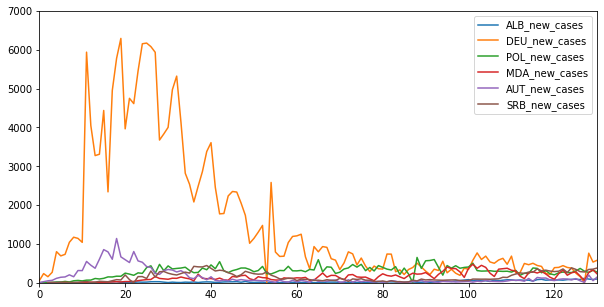

In [5]:
covidPlot.plot(ylim=[0, 7000], xlim=[0, 130], y=["ALB_new_cases", "DEU_new_cases", "POL_new_cases", "MDA_new_cases", "AUT_new_cases", "SRB_new_cases"],figsize=(10,5)) 

## Creating Dictionary of Continents with their Countries

In [6]:
ContinentList = {}
for country in data:
    if "continent" in data[country]:
        if data[country]["continent"] not in ContinentList: 
            ContinentList[data[country]["continent"]] = []
        ContinentList[data[country]["continent"]].append(country)

print("\n All Continents with their Countries:")      
print(ContinentList) 


 All Continents with their Countries:
{'Asia': ['AFG', 'ARM', 'AZE', 'BHR', 'BGD', 'BTN', 'BRN', 'KHM', 'CHN', 'GEO', 'HKG', 'IND', 'IDN', 'IRN', 'IRQ', 'ISR', 'JPN', 'JOR', 'KAZ', 'KWT', 'KGZ', 'LAO', 'LBN', 'MYS', 'MDV', 'MNG', 'MMR', 'NPL', 'OMN', 'PAK', 'PSE', 'PHL', 'QAT', 'SAU', 'SGP', 'KOR', 'LKA', 'SYR', 'TWN', 'TJK', 'THA', 'TLS', 'TUR', 'ARE', 'UZB', 'VNM', 'YEM'], 'Europe': ['ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FRO', 'FIN', 'FRA', 'DEU', 'GIB', 'GRC', 'GGY', 'HUN', 'ISL', 'IRL', 'IMN', 'ITA', 'JEY', 'OWID_KOS', 'LVA', 'LIE', 'LTU', 'LUX', 'MKD', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'UKR', 'GBR', 'VAT'], 'Africa': ['DZA', 'AGO', 'BEN', 'BWA', 'BFA', 'BDI', 'CMR', 'CPV', 'CAF', 'TCD', 'COM', 'COG', 'CIV', 'COD', 'DJI', 'EGY', 'GNQ', 'ERI', 'ETH', 'GAB', 'GMB', 'GHA', 'GIN', 'GNB', 'KEN', 'LSO', 'LBR', 'LBY', 'MDG', 'MWI', 'MLI', 'MRT', 'MUS', 'MAR'

## Creating worldPlot for our Visualization

In [7]:
worldPlot = pd.DataFrame(columns = columns)
allDates = pd.date_range(start="31/12/2019", end=datetime.datetime.now().date())
    
columns = ["date", "Continent", "Country", "new_cases"]
worldPlot = pd.DataFrame(columns = columns)
for continent in ContinentList:
       for country in ContinentList[continent]:
              dates = []
              new_cases = []
              new_deaths = []
              for countryData in data[country]["data"]:
                     if "new_cases" in countryData:
                            new_deaths.append(countryData["new_deaths"])
                            new_cases.append(countryData["new_cases"])
                            dates.append(countryData["date"])
              if len(allDates) == len(new_cases): #only getting full data with every date
                     newDf = pd.DataFrame(columns = columns)
                     newDf["date"], newDf["Continent"], newDf["Country"], newDf["new_cases"], newDf["new_deaths"] = [dates, continent, country, new_cases, new_deaths]
                     worldPlot = pd.concat([worldPlot, newDf])

print(worldPlot)

date Continent Country  new_cases  new_deaths
0    2019-12-31      Asia     CHN       27.0         0.0
1    2020-01-01      Asia     CHN        0.0         0.0
2    2020-01-02      Asia     CHN        0.0         0.0
3    2020-01-03      Asia     CHN       17.0         0.0
4    2020-01-04      Asia     CHN        0.0         0.0
..          ...       ...     ...        ...         ...
200  2020-07-18   Oceania     AUS      425.0         3.0
201  2020-07-19   Oceania     AUS      206.0         2.0
202  2020-07-20   Oceania     AUS      361.0         4.0
203  2020-07-21   Oceania     AUS      267.0         1.0
204  2020-07-22   Oceania     AUS      359.0         3.0

[4920 rows x 5 columns]


## Saving worldPlot to "world

In [10]:
worldPlot.to_csv("../web/data/world.csv")